# Loading and saving matlab files:



In [50]:
import numpy as np
from scipy import stats
%matplotlib inline

from scipy import io as spio
a = np.ones((3, 3))
spio.savemat('filemat', {'a': a}) #savemat expects a dictionsary
data = spio.loadmat('filemat', struct_as_record=True)
data['a']


array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

# Special Functions : Scipy.speacial

special funcitons are trancscendental functions. The docstring of the scipy.

special module is well-written, so we won't list all functions here. Frequently used ones are:

- Bessel function, such as scipy.special.jn()(nth integer order bessel function)
- Elliptic function (scipy.special.ellipj() for the jacobian elliptic function...)
- Gamma function: Scipy.special.gamma(), also note scipy.special,gammaln() which will give the log of Gamma to a higher numerical precionsion.
- Erf, the area uner a Gaussian curve: Scipy.special.erf()




# Linear Algebra operations: Scipy.linalg

The [scipy.linalg](http://docs.scipy.org/doc/scipy/reference/linalg.html#module-scipy.linalg) module proivides standard linear algebra operations, relying on an underlying efficient implementation (BLAS, LAPACK)

- The [scipy.linalg.det()](http://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.det.html#scipy.linalg.det) function computes the determinant of a square matrix:


In [16]:
from scipy import linalg
arr = np.array([[1, 2], [3, 4]])
print (linalg.det(arr))
arr = np.array([[3, 2], [6, 4]])

print (linalg.det(arr))

linalg.det(np.ones((3, 4)))

-2.0
0.0


ValueError: expected square matrix

- The scipy.linalg.inv() function computes the inverse of a square matrix:

In [21]:
arr = np.array(([[1, 2], [3, 4]]))
iarr = linalg.inv(arr)
print (iarr)

print (np.allclose(np.dot(arr, iarr), np.eye(2)))


[[-2.   1. ]
 [ 1.5 -0.5]]
True


- More advanced operations are available, for example singular-value decomposition (SVD):


In [27]:
arr = np.arange(9).reshape((3, 3)) + np.diag([1, 0, 1])

uarr, spec, vharr = linalg.svd(arr)

The resulting array spectrum is:

In [28]:
spec

array([ 14.88982544,   0.45294236,   0.29654967])

The original matrix can re re-composed by a matrix multiplcation of the outputs of > svd with *np.dot >

In [29]:
sarr = np.diag(spec)
svd_mat = uarr.dot(sarr).dot(vharr)
np.allclose(svd_mat, arr)


True

# Fast Fourier Transforms: Scipy.fftpack

The Scipy.fftpack module allows to compute fast Fourier transforms. As an illustration, a (noisy) input signmal may look like:


In [52]:
time_step = .02
period = 5
time_vec = np.arange(0, 20, time_step)
sig = np.sin(2 * np.pi / period * time_vec) + \
      0.5 * np.random.randn(time_vec.size)
    

The observer doesn’t know the signal frequency, only the sampling time step of the signal sig. The signal is supposed to come from a real function so the Fourier transform will be symmetric. The [scipy.fftpack.fftfreq()](http://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.fftfreq.html#scipy.fftpack.fftfreq) function will generate the sampling frequencies and [scipy.fftpack.fft()](http://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.fft.html#scipy.fftpack.fft) will compute the fast Fourier transform:

In [53]:
from scipy import fftpack
sample_freq = fftpack.fftfreq(sig.size, d=time_step)
sig_fft = fftpack.fft(sig)

Because the resulting power is symmetric, only the positive part of the spectrum needs to be used for finding the frequency:

In [54]:
pidxs = np.where(sample_freq > 0)
freqs = sample_freq[pidxs]
power = np.abs(sig_fft)[pidxs]

The signal frequency can be found by

In [55]:
freq = freqs[power.argmax()]
np.allclose(freq, 1./period) # check that correct freq is found 

True

Now the high-frequency noise will be removed from the Fourier tranformed signal:


In [56]:
sig_fft[np.abs(sample_freq) > freq] = 0

The resulting filtered signal can be computed by the [scipy.fftpack.ifft()](http://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.ifft.html#scipy.fftpack.ifft)function:

In [57]:
main_sig = fftpack.ifft(sig_fft)

The result can be viewed with:

C:\Users\ElPanda\Anaconda3\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


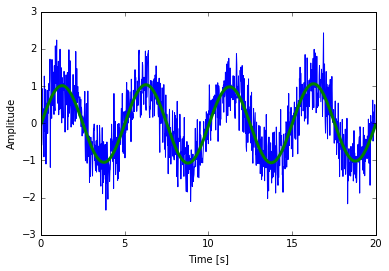

In [51]:
import pylab as plt
plt.figure()
plt.plot(time_vec, sig)
plt.plot(time_vec, main_sig, linewidth=3)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

# Numpy.fft
Numpy also has an implrementation of FFT ([numpy.fft](http://docs.scipy.org/doc/numpy/reference/routines.fft.html#module-numpy.fft)). However, in general the scipy one should be preferred, as it uses more efficient underlying implementataions.


# Optimization and fit: Scipy.optimize

Optimization is the problem of finding a numberical solution to a minimization or equality.

The [scipy.optimize](http://docs.scipy.org/doc/scipy/reference/optimize.html#module-scipy.optimize) module provides useful alorithms for function minimization (scalar or multi-dimensional), curve fitting and root finding.

In [59]:
from scipy import optimize

**Finding the minimum of a scalar function**

Let's define the following function:



In [60]:
def f(x):
    return x**2 + 10*np.sin(x)

and plot it


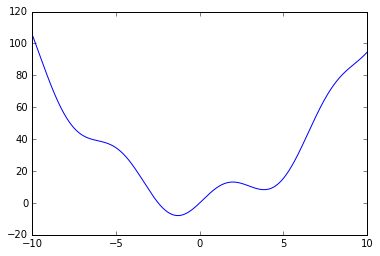

In [61]:
x = np.arange(-10, 10, .01)
plt.plot(x, f(x))
plt.show()

This function has a global minimum around -1.3 and a local minimum around 3.8.

The general and efficient way to find a minimum for this function is to conduct a gradient descent starting from a given initial point. The BFGS algorithm is a good way of doing this:

In [62]:
optimize.fmin_bfgs(f, 0)

Optimization terminated successfully.
         Current function value: -7.945823
         Iterations: 5
         Function evaluations: 18
         Gradient evaluations: 6


array([-1.30644012])

A possible issue with this approach is that, if the function has local minima the algorithm may find these local minima instead of the global minimum depending on the initial point.

In [67]:
optimize.fmin_bfgs(f, 3, disp=0)

array([ 3.83746709])

If we don’t know the neighborhood of the global minimum to choose the initial point, we need to resort to costlier global optimization.

To find the global minimum, we use [scipy.optimize.basinhopping()](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.basinhopping.html#scipy.optimize.basinhopping) (which combines a local optimizer with stochastic sampling of starting points for the local optimizer):


New in version 0.12.0: basinhopping was added in version 0.12.0 of Scipy

In [66]:
optimize.basinhopping(f, 0)

                        fun: -7.9458233756152845
 lowest_optimization_result:       fun: -7.9458233756152845
 hess_inv: array([[ 0.08582305]])
      jac: array([  1.19209290e-07])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([-1.30644001])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 1530
                        nit: 100
                       njev: 510
                          x: array([-1.30644001])

# Finding the roots of a scalar function

To find a root i.e. a point where $f(x) = 0$, of the function $f$ above we can use for example [scipy.optimize.fsolve](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html#scipy.optimize.fsolve):

In [68]:
root = optimize.fsolve(f, 1) # our initial guess is 1
root

array([ 0.])